# Mintun1984 for Twilite and Image-Derived Input Functions

## Setup

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

from Mintun1984Context import Mintun1984Context
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# everything is decay corrected
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "kernels")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")

oo1dir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421150523", "pet")
idif = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
twil = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
pet = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

hodir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421152358", "pet")
ks_idif = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Boxcar-main7-rc1p85-vrc1-3000-qm.nii.gz")
ks_twil = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Artery-main7-rc1p85-vrc1-3000-qm.nii.gz")

codir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421144815", "pet")
v1_idif = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-idif_martinv1.nii.gz")
v1_twil = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-twilite_martinv1.nii.gz")

data_dict_idif = {
    "input_func_fqfn": idif,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_idif,
    "ks_fqfn": ks_idif,
    "nlive": 1000,
    "tag": "playground_mintun1984_idif"
}
data_dict_twil = {
    "kernel_fqfn": kern,
    "input_func_fqfn": twil,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_twil,
    "ks_fqfn": ks_twil,
    "nlive": 1000,
    "tag": "playground_mintun1984_twil"
}

truth_idif = [2.02266859e-01, 1.30503331e+00, 7.19494722e-01, 1.00390665e+01, 9.82339382e+00, 1.74320833e+01, 1.72211248e-02]
truth_twil = [0.51932539, 0.68335921, 0.70828213, 4.55715122, 3.82516299, 6.14729027, 0.03415969]
mm_idif = Mintun1984Context(data_dict_idif)
mm_twil = Mintun1984Context(data_dict_twil)

parc_index = 25

## Inspect Mintun1984Context twil

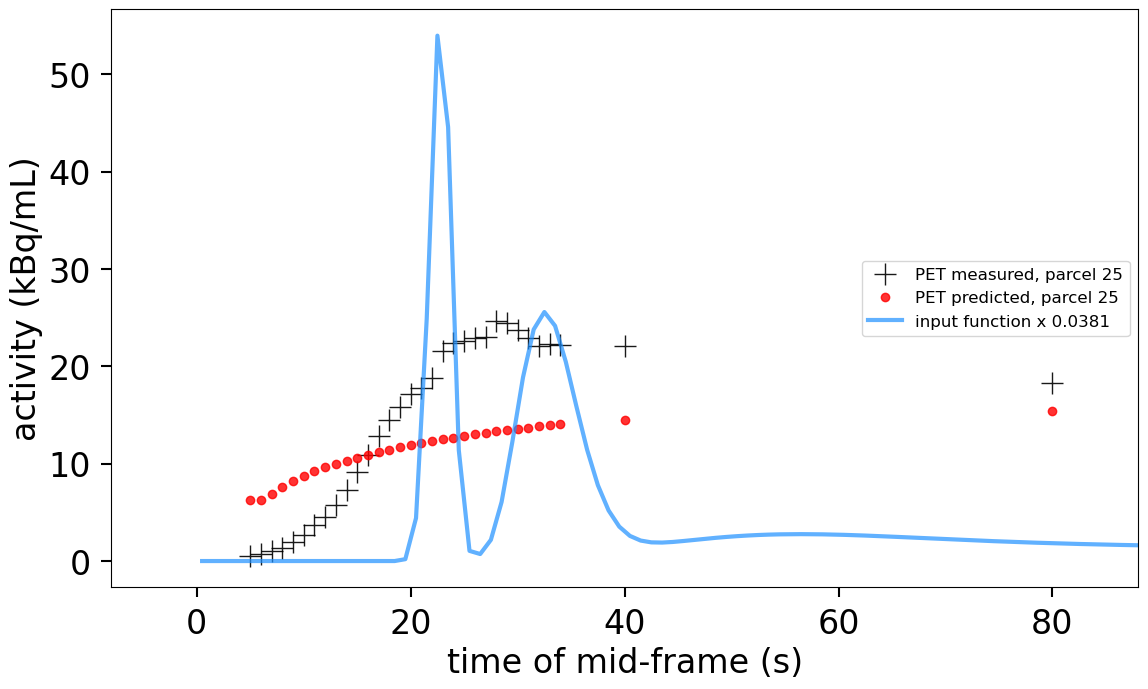

In [4]:
mm_twil.plotting.plot_truths(truths=truth_twil, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

23744it [00:33, 710.85it/s, batch: 1 | bound: 8 | nc: 1 | ncall: 1048470 | eff(%):  2.154 | loglstar: 61.080 < 67.080 < 63.875 | logz: 52.707 +/-  0.103 | stop:  0.815]            


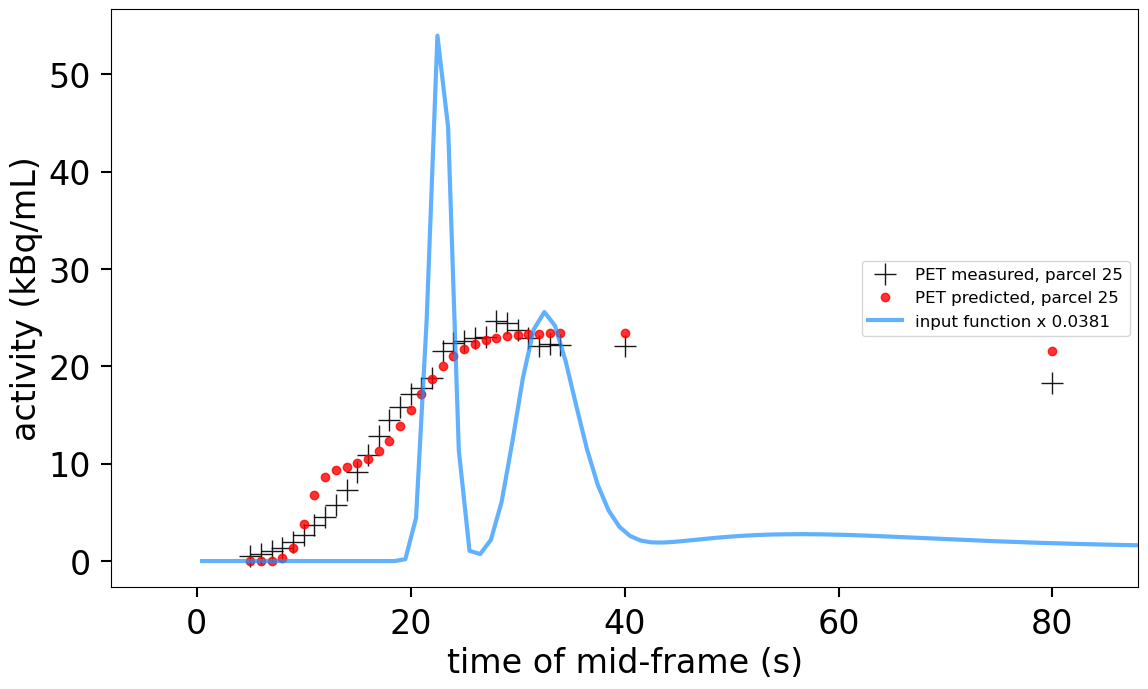

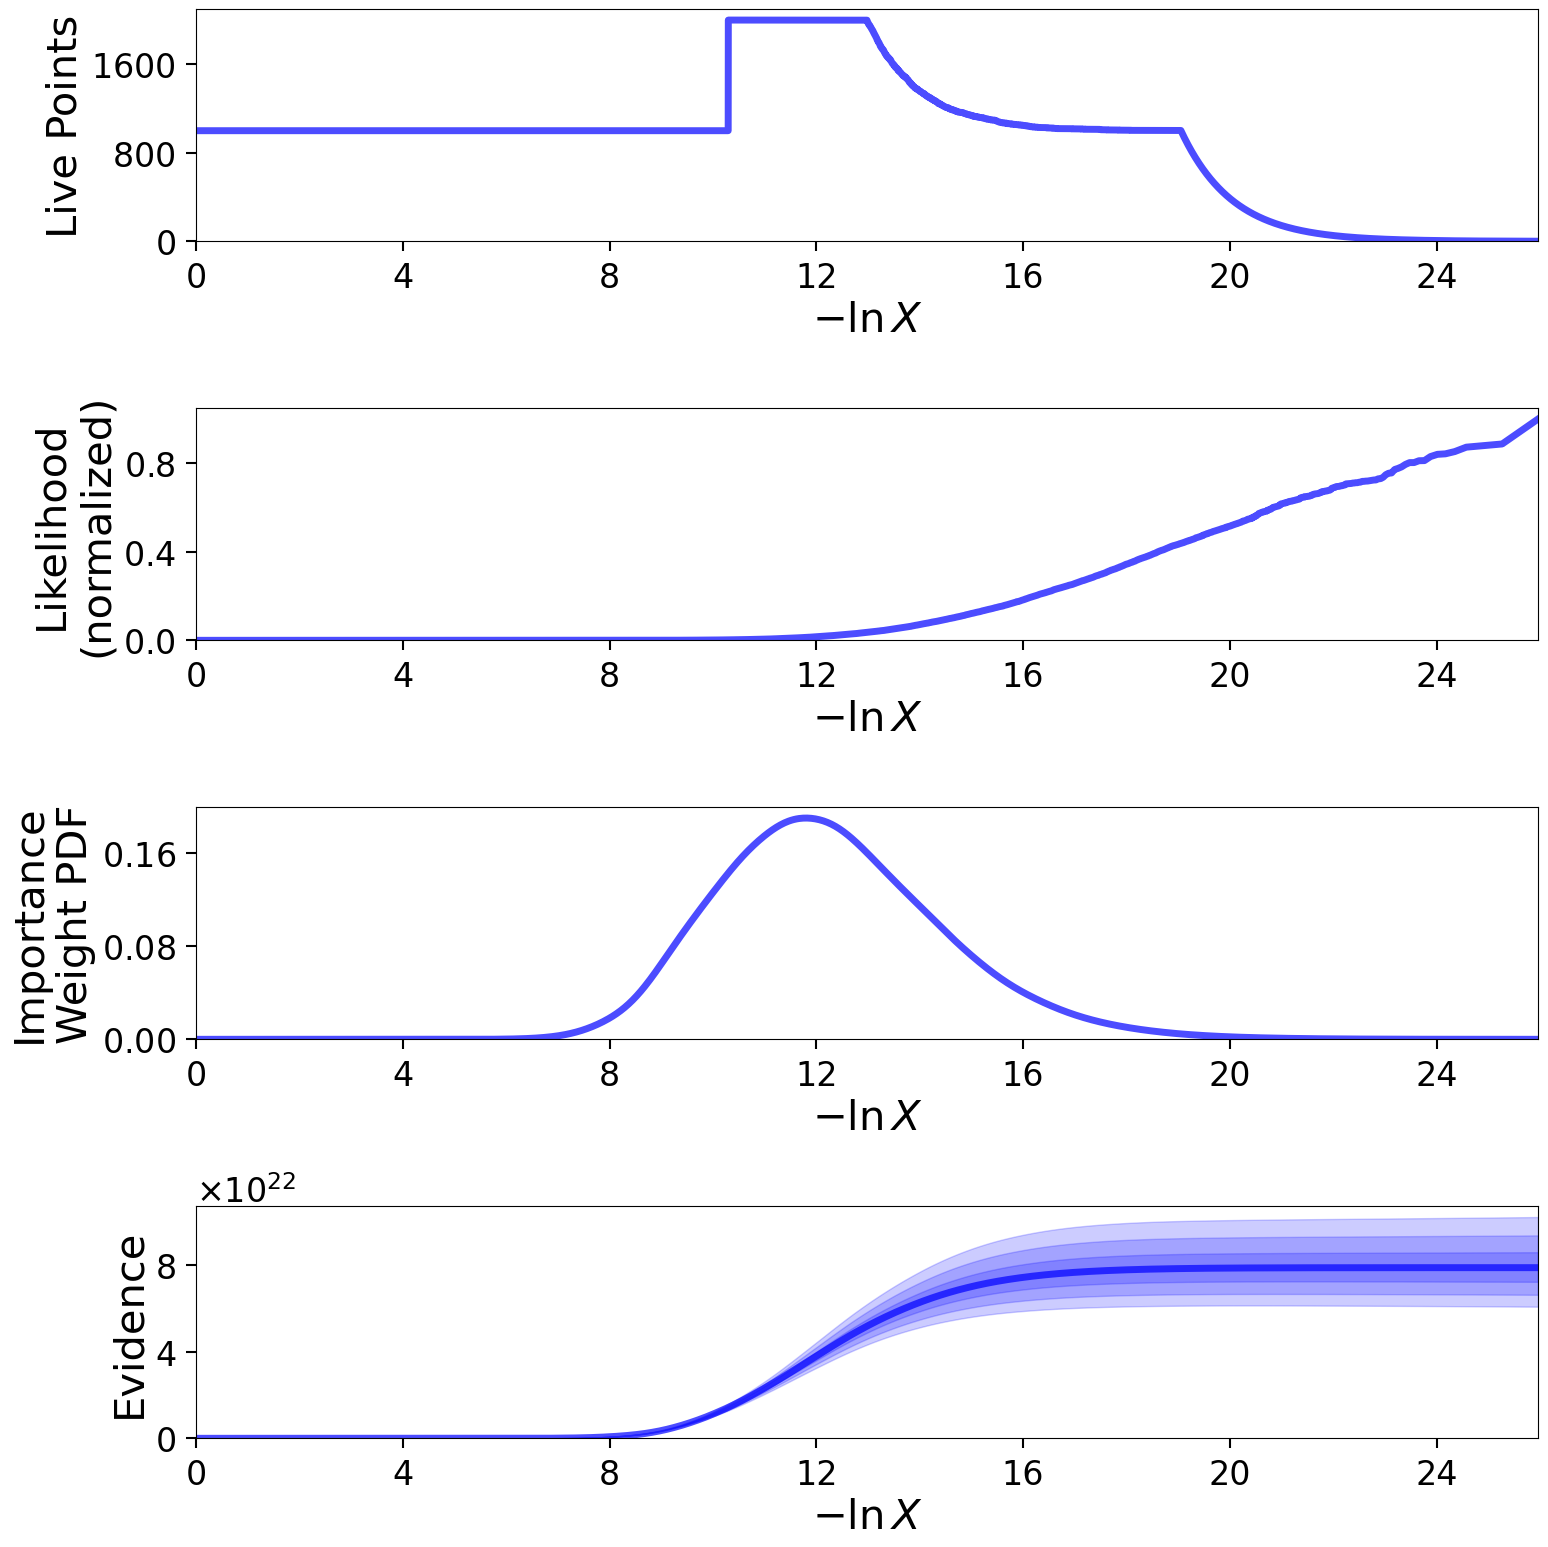

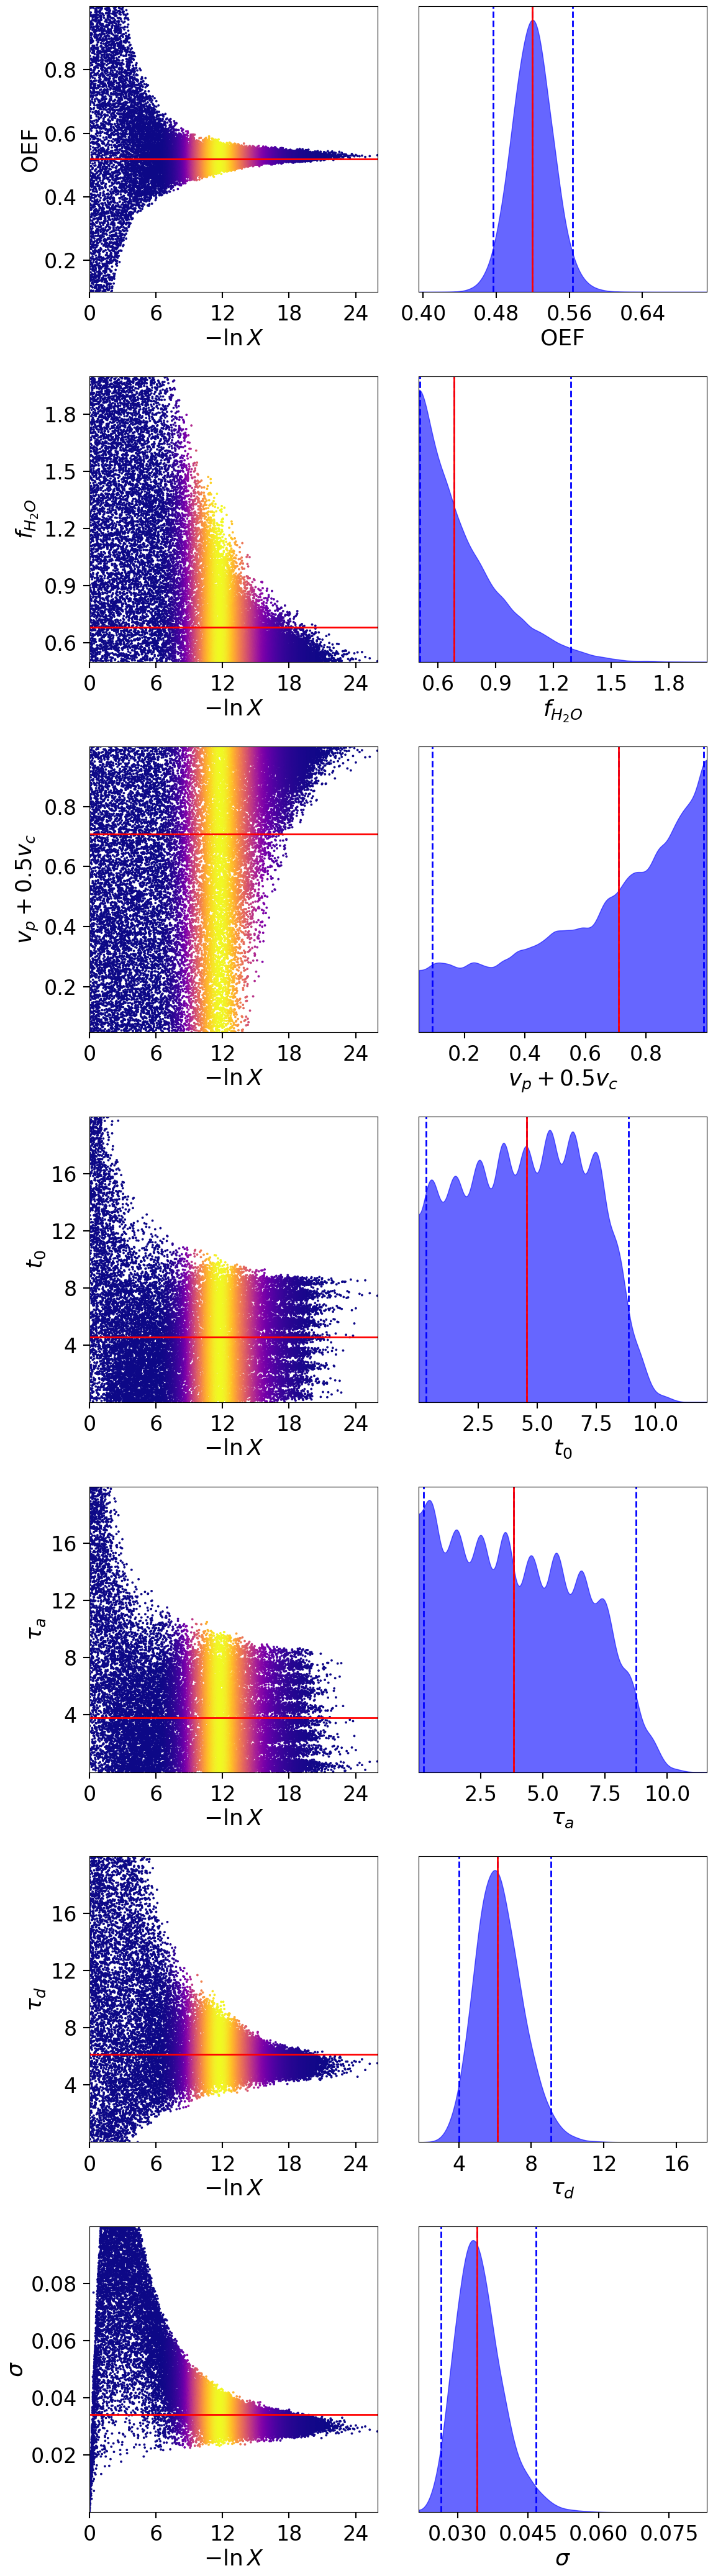

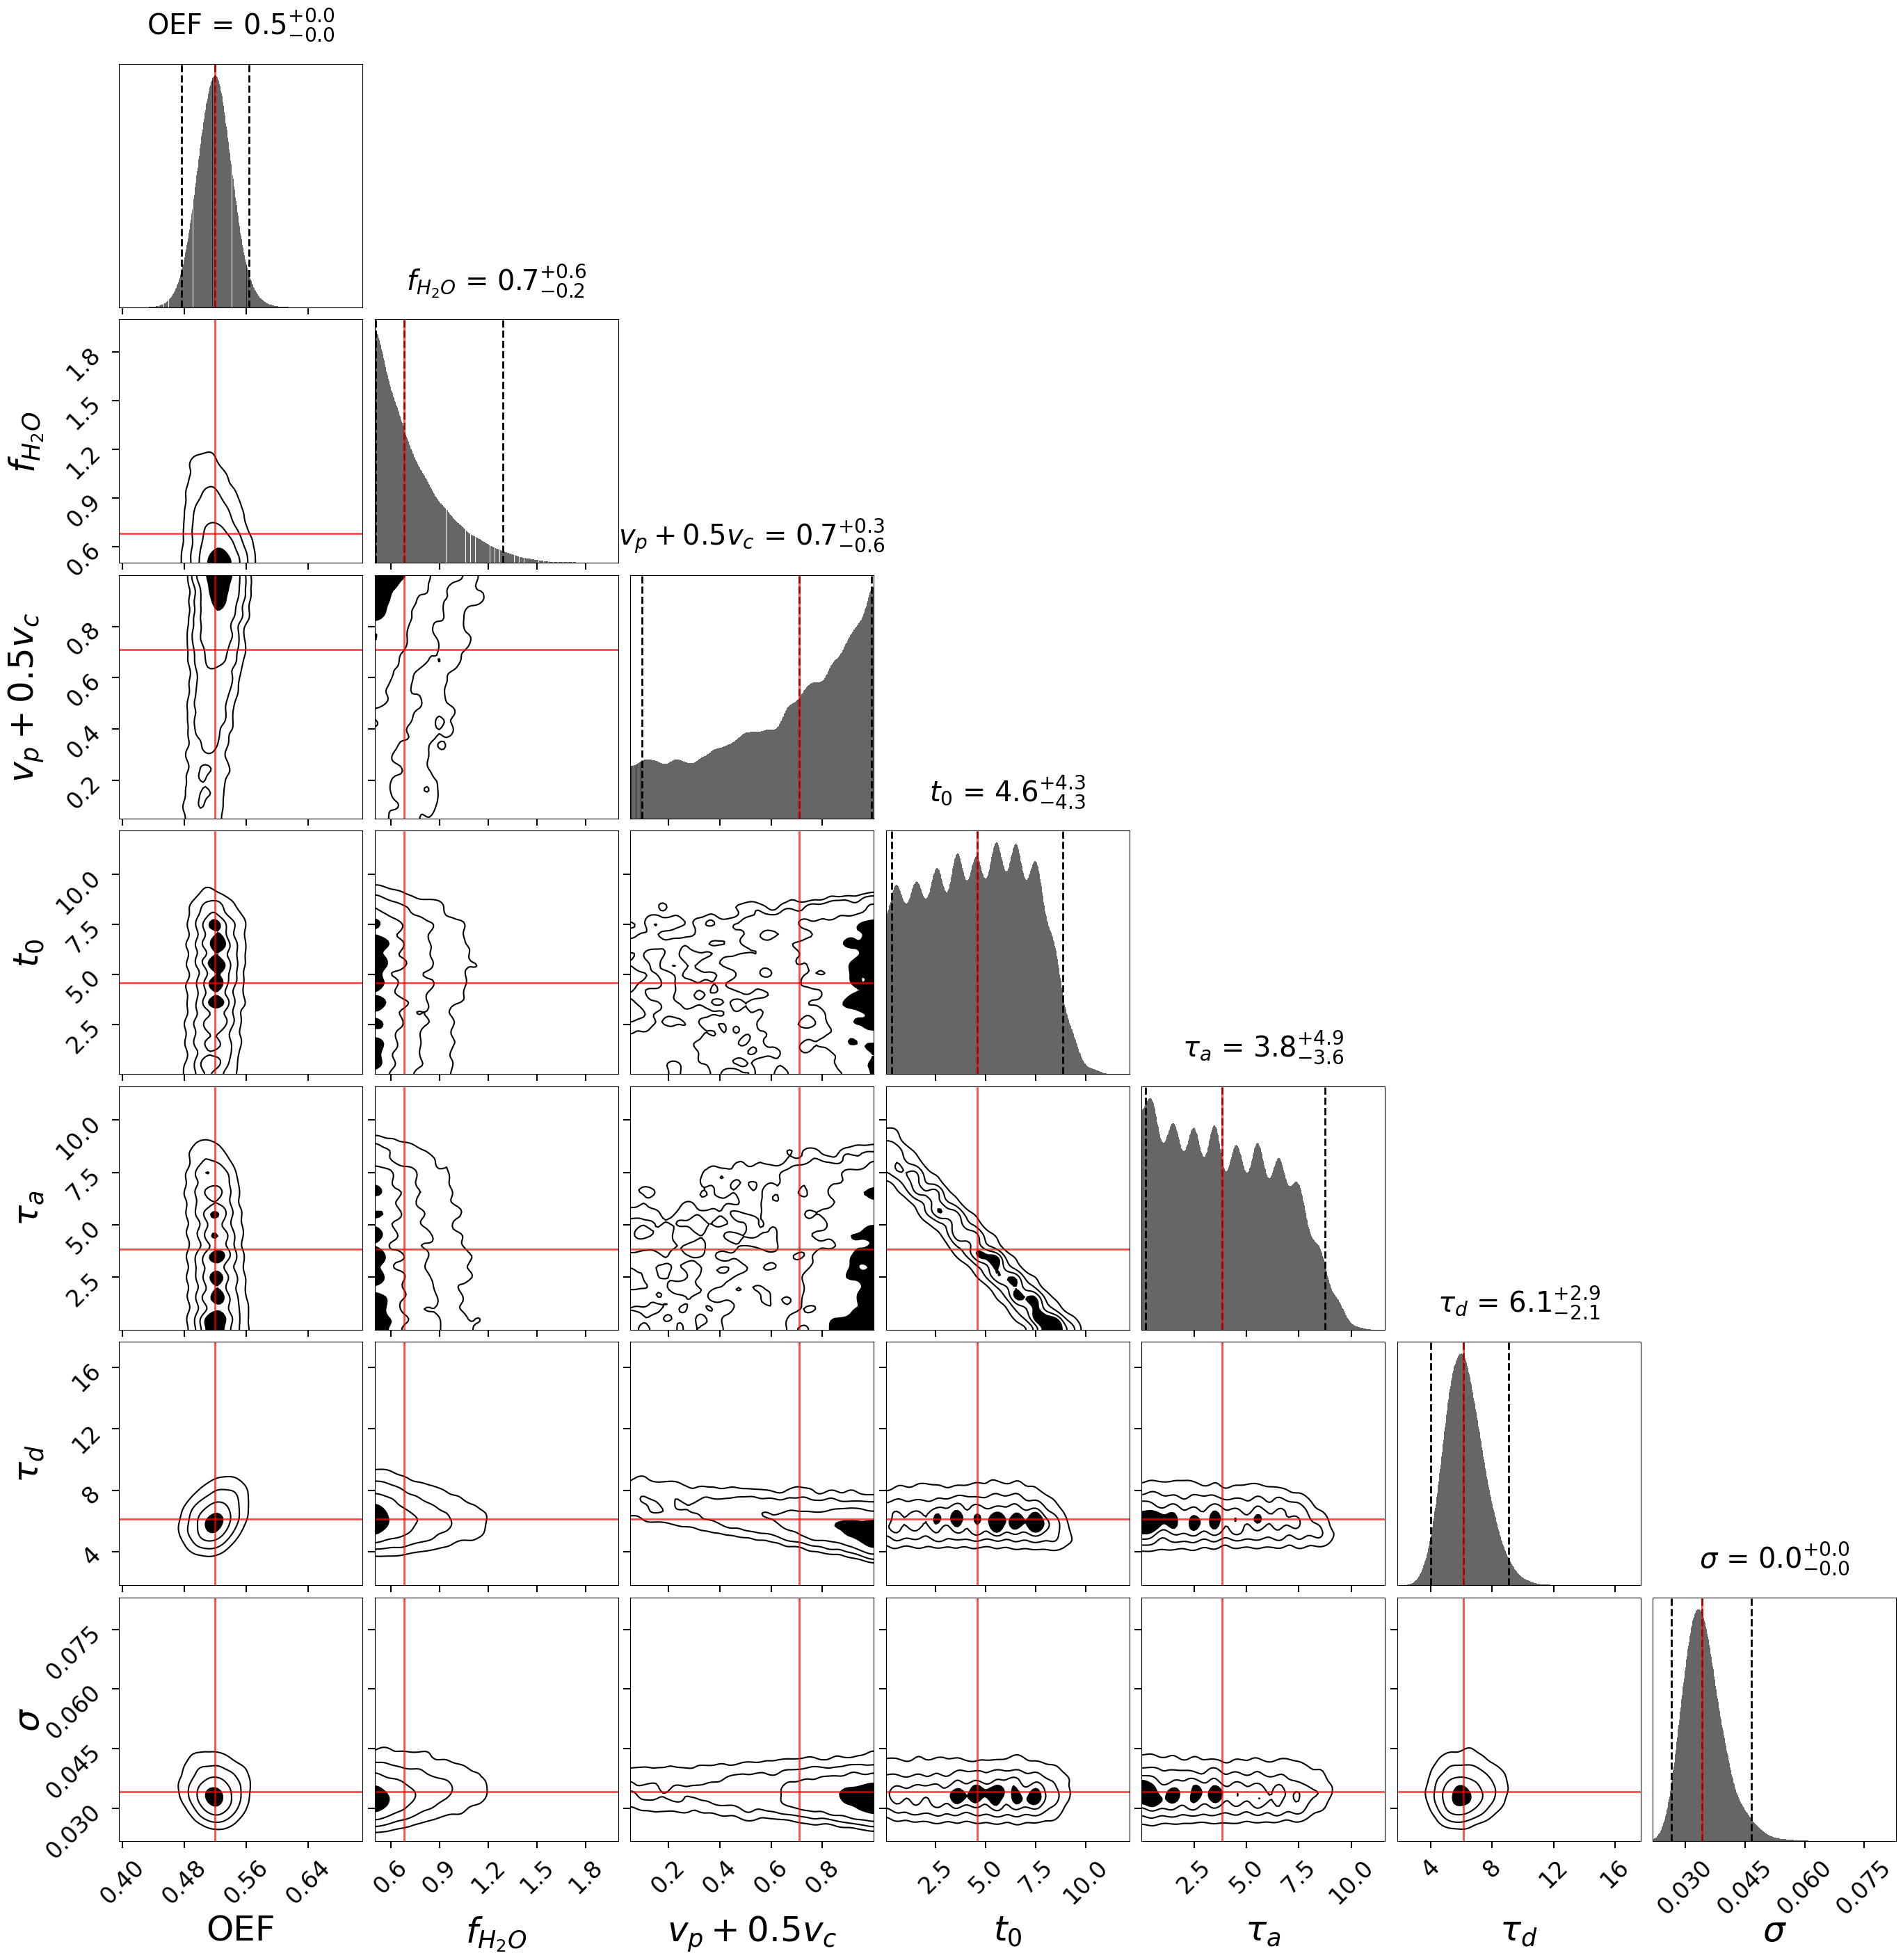

In [5]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.solver.run_nested(print_progress=True, parc_index=25)
mm_twil.plotting.plot_results(tag="playground_mintun1984_twil", parc_index=25)

## Inspect Mintun1984Context idif

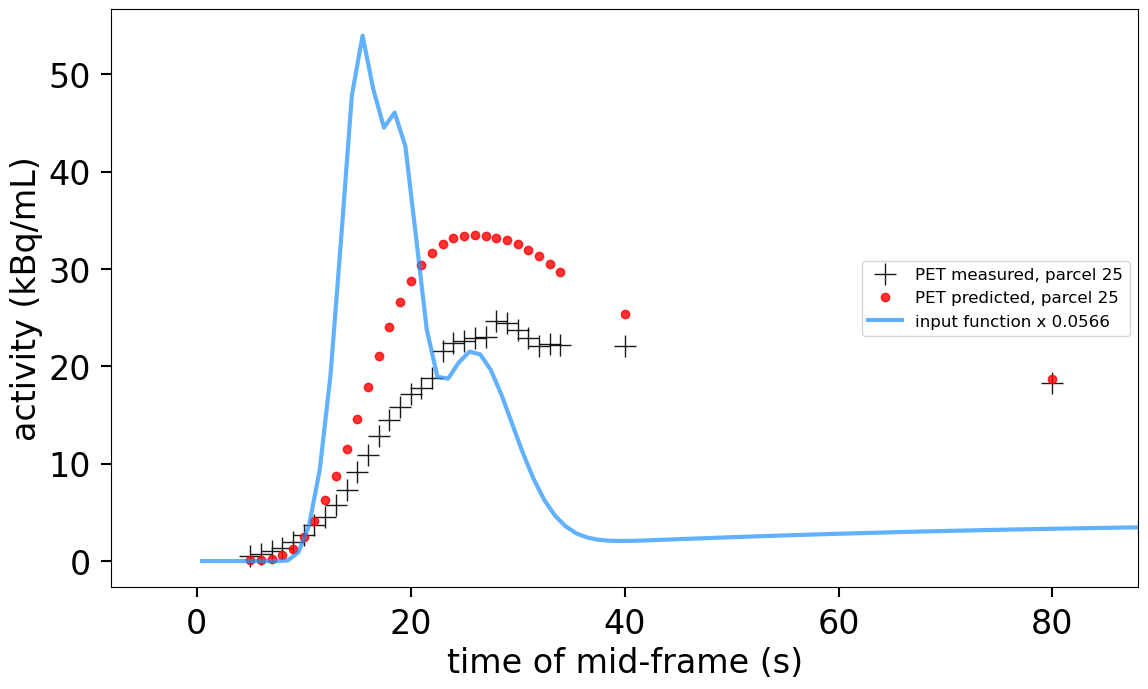

In [6]:
mm_idif.plotting.plot_truths(truths=truth_idif, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

21420it [00:26, 800.71it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 896324 | eff(%):  2.255 | loglstar: 82.855 < 87.420 < 83.471 | logz: 76.364 +/-  0.078 | stop:  0.863]            


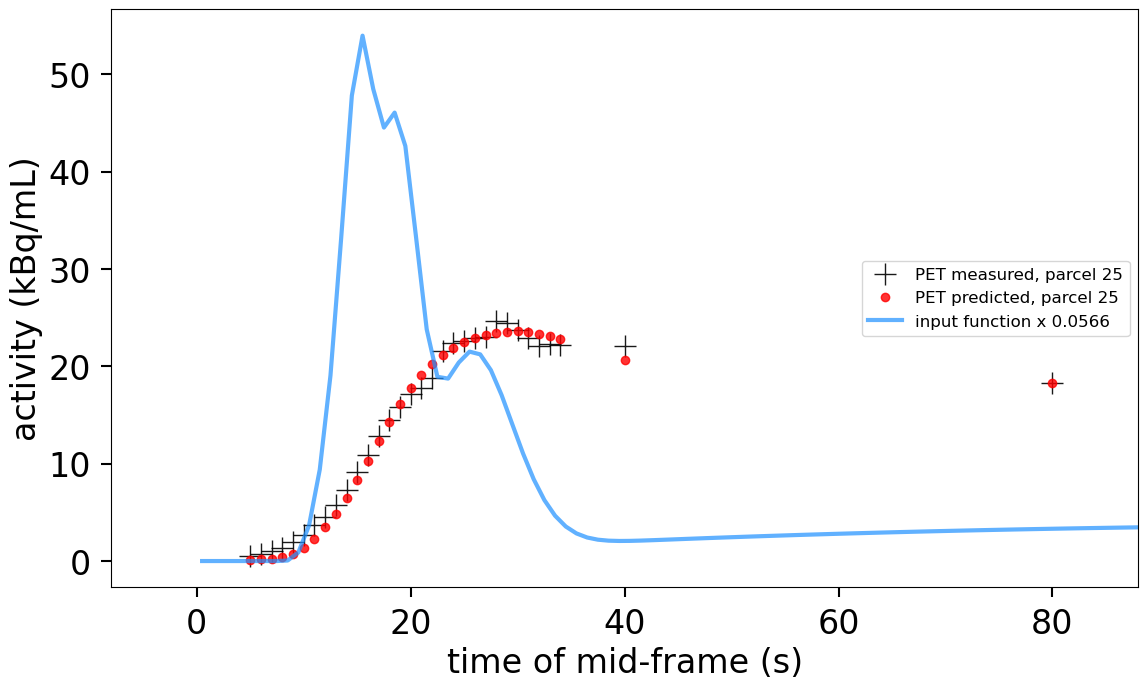

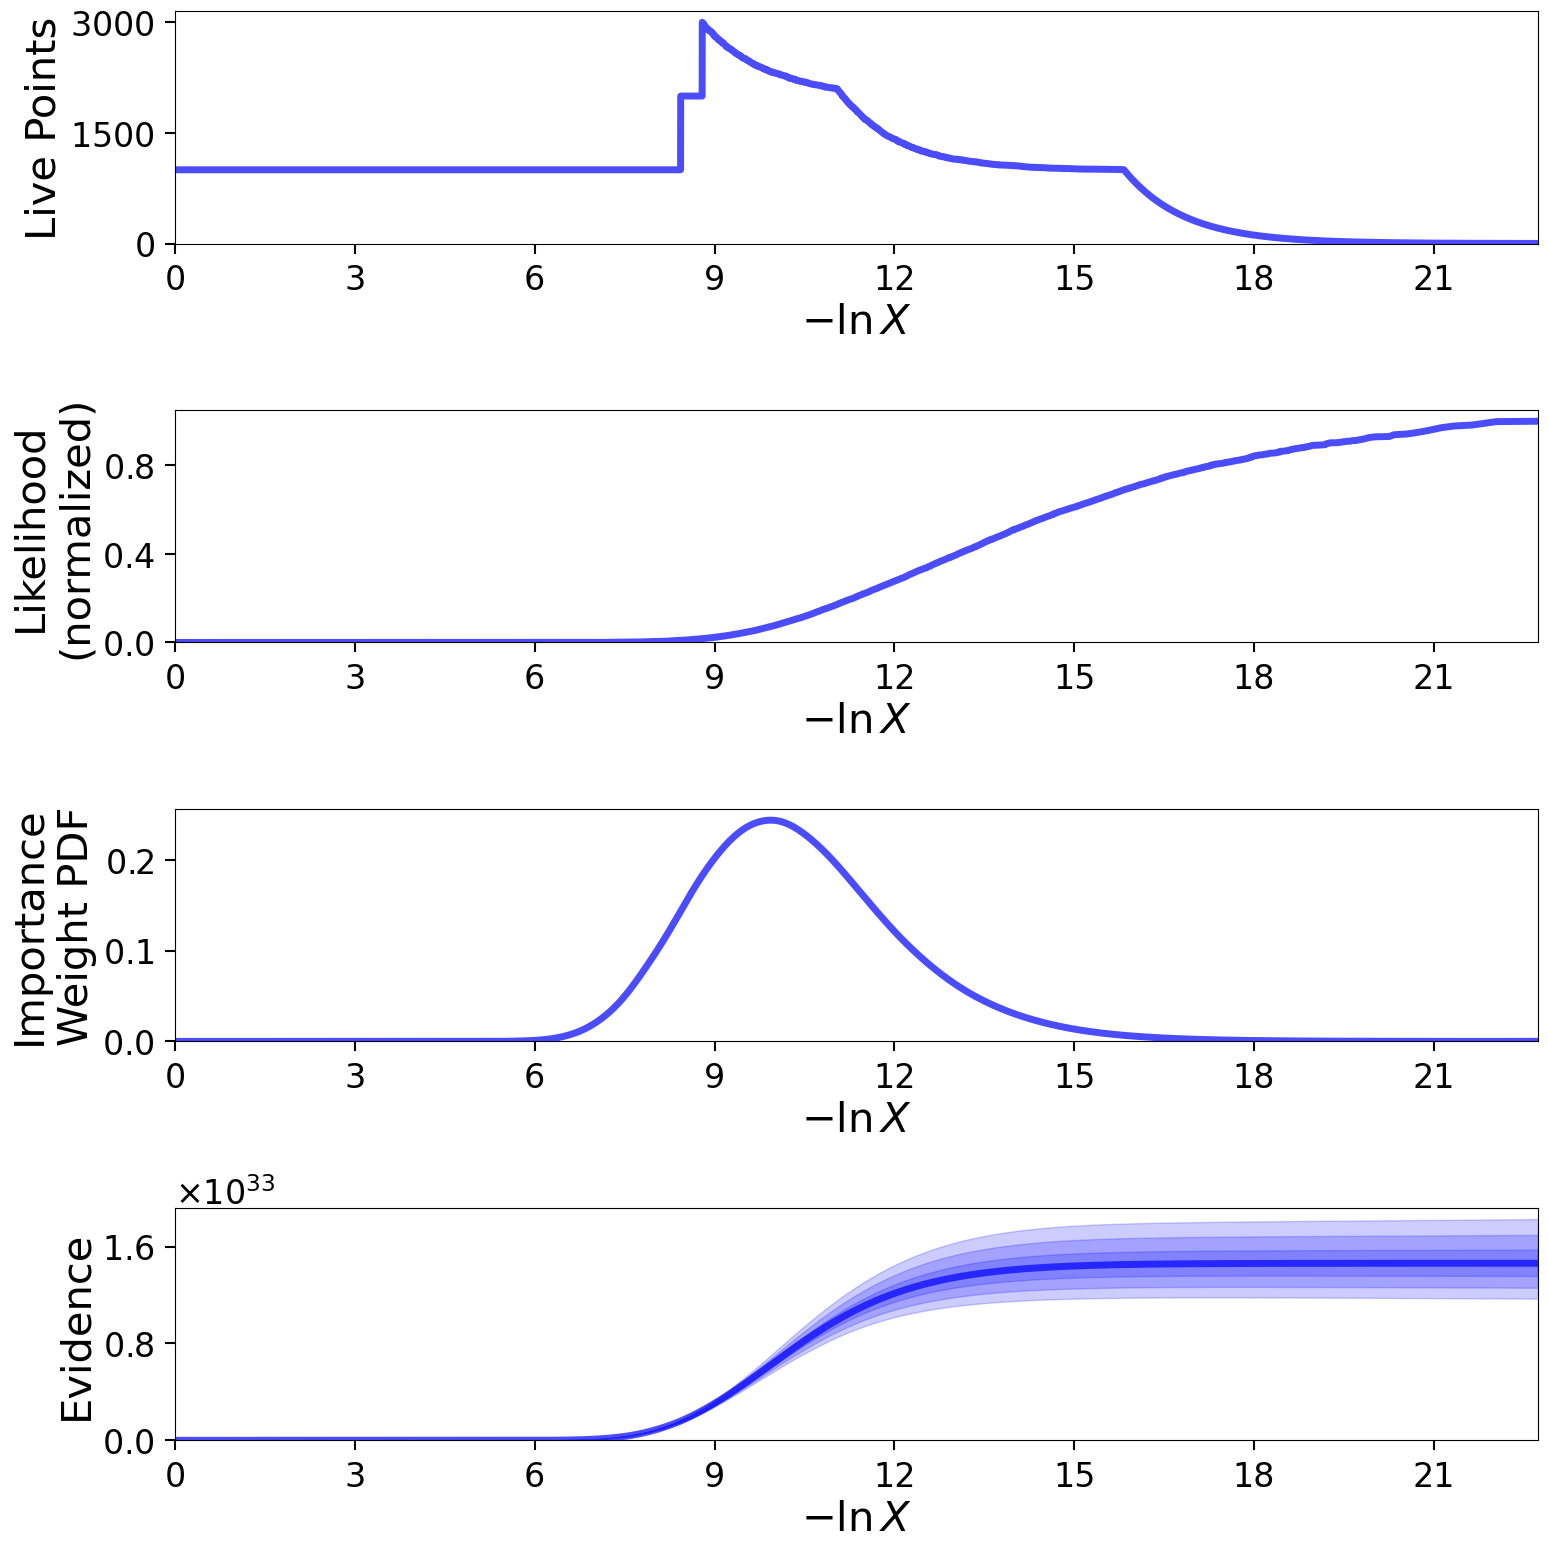

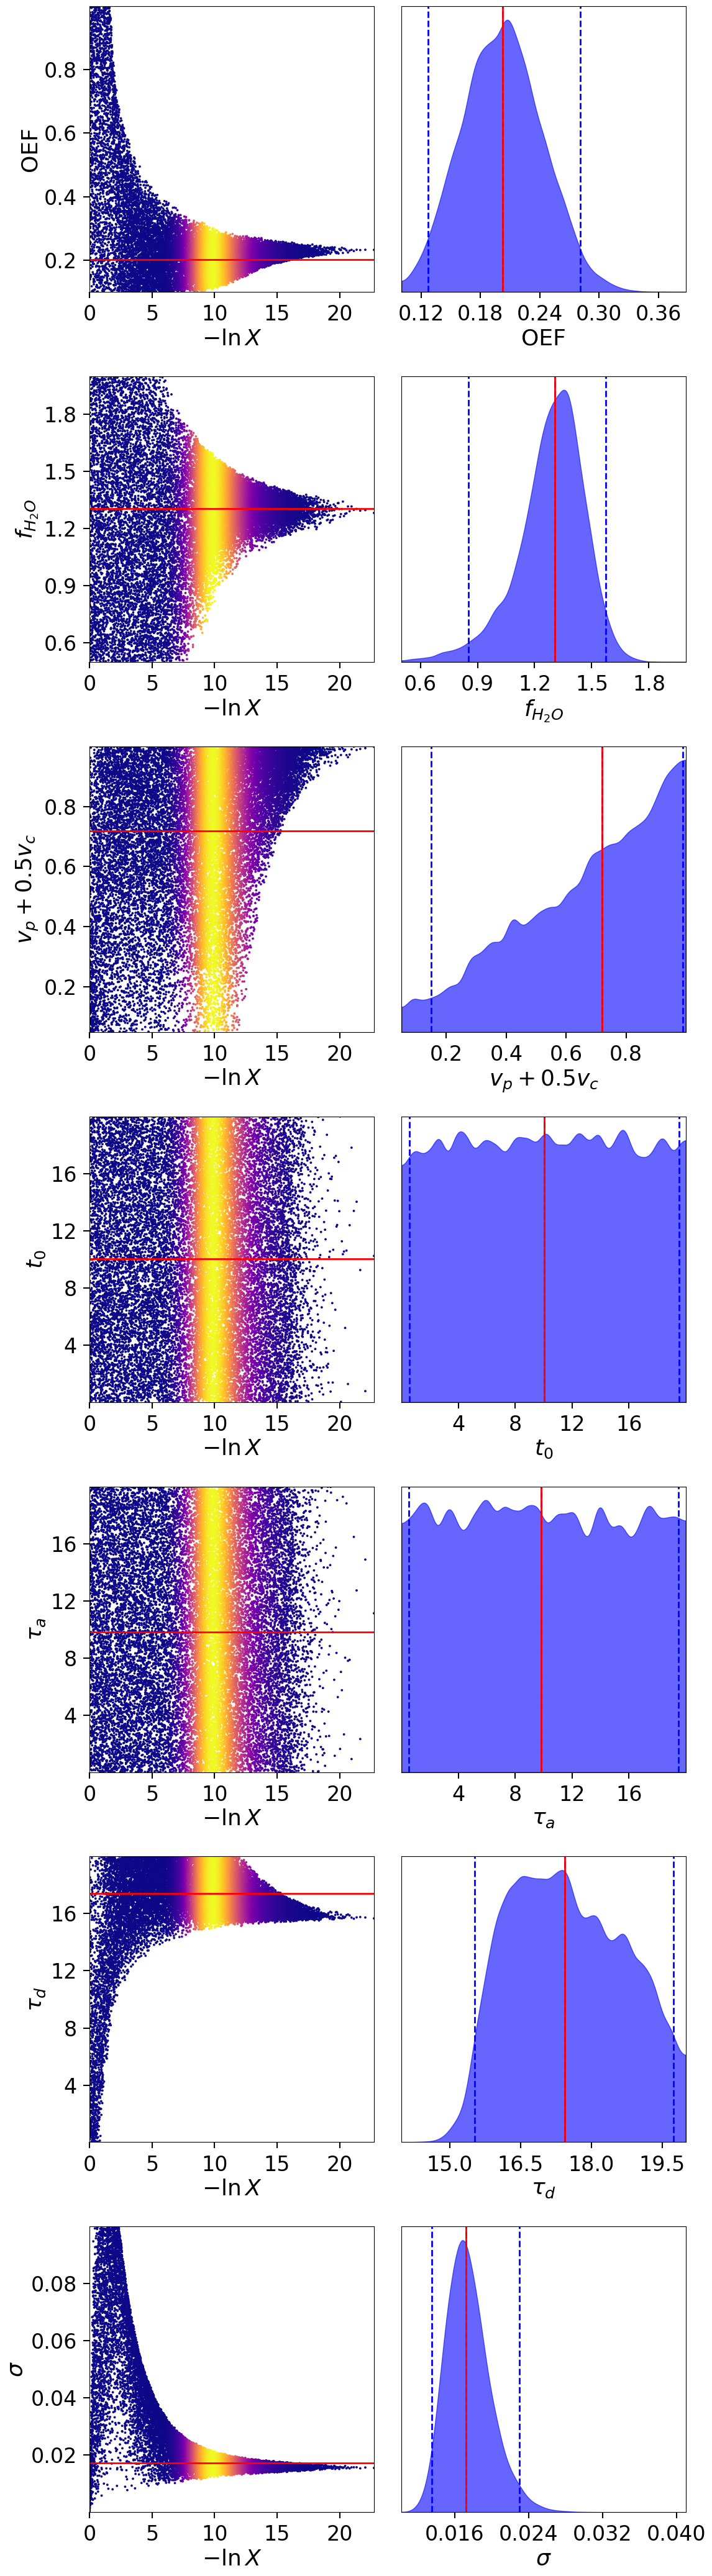

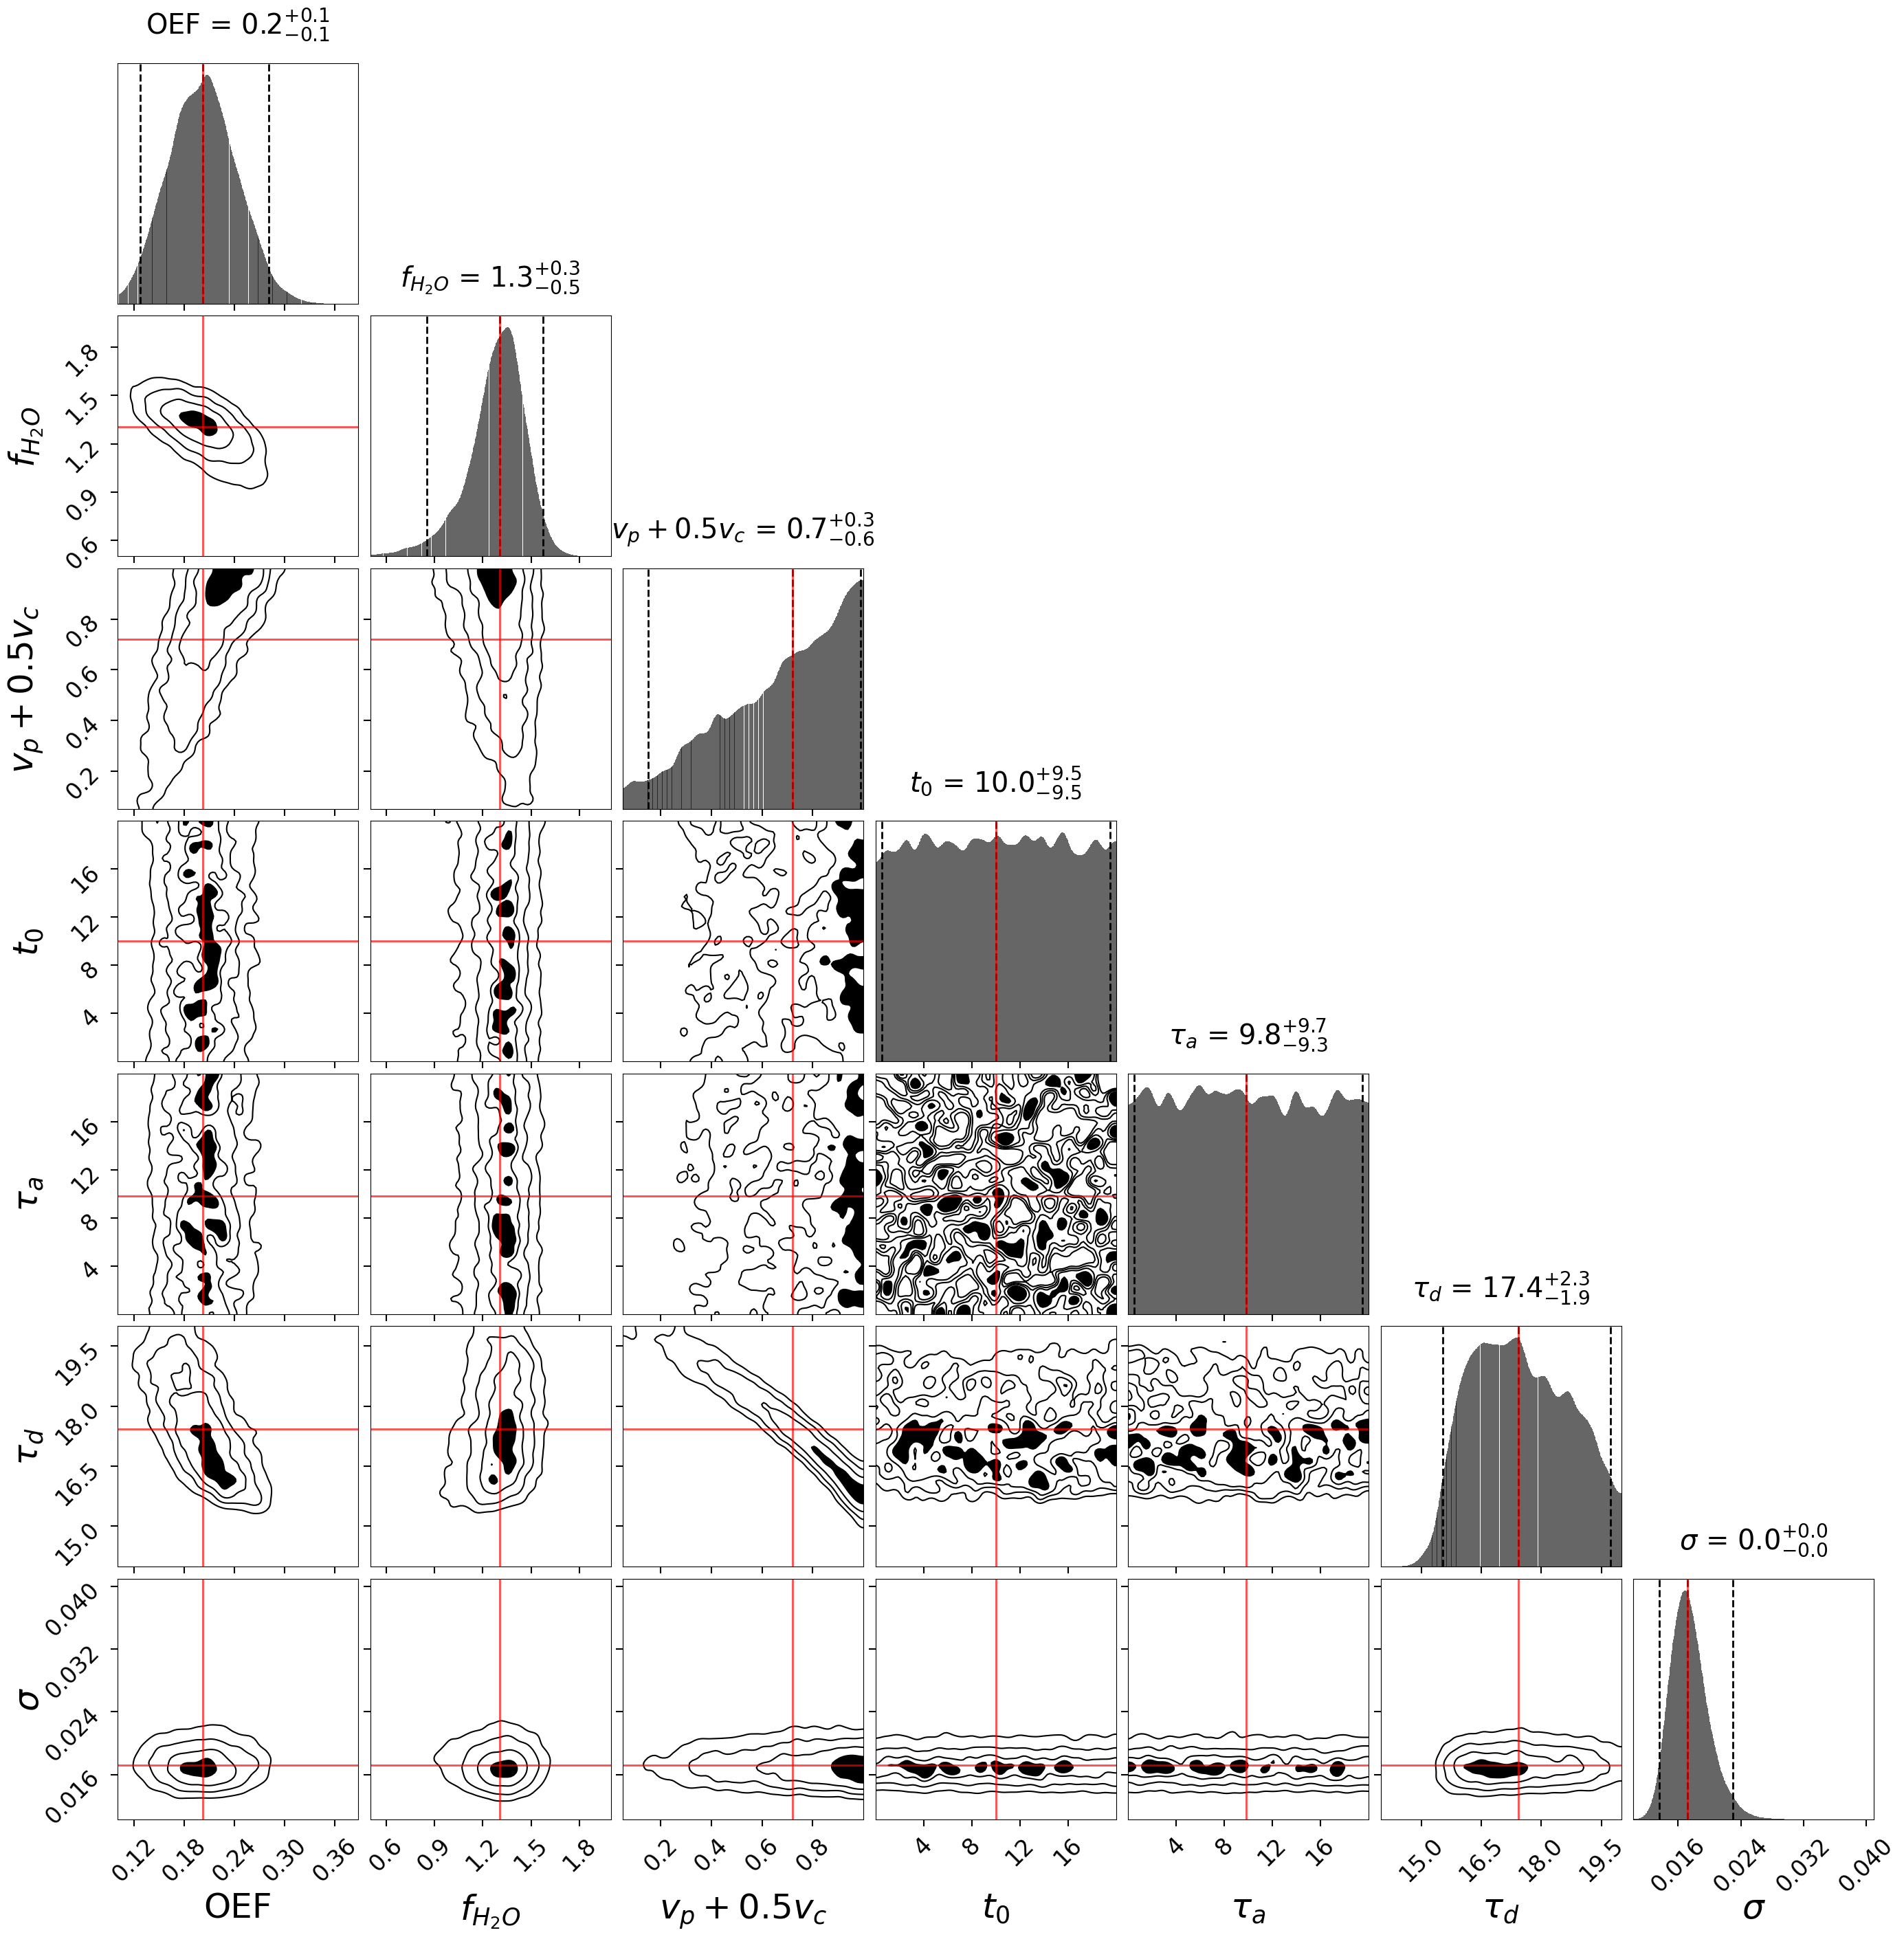

In [7]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.solver.run_nested(print_progress=True, parc_index=25)
mm_idif.plotting.plot_results(tag="playground_mintun1984_idif", parc_index=25)

In [8]:
mm_twil.data.print_truths()
mm_idif.data.print_truths()



=============================== Truths ===============================
Parameter                        Value
----------------------------------------
OEF                            0.51933
$f_{H_2O}$                     0.68336
$v_p + 0.5 v_c$                0.70828
$t_0$                          4.55715
$\tau_a$                       3.82516
$\tau_d$                       6.14729
$\sigma$                       0.03416


=============================== Truths ===============================
Parameter                        Value
----------------------------------------
OEF                            0.20227
$f_{H_2O}$                     1.30503
$v_p + 0.5 v_c$                0.71949
$t_0$                         10.03907
$\tau_a$                       9.82339
$\tau_d$                      17.43208
$\sigma$                       0.01722


In [12]:
pprint(mm_twil.solver.truths)
pprint(mm_idif.solver.truths)



array([0.51932539, 0.68335921, 0.70828213, 4.55715122, 3.82516299,
       6.14729027, 0.03415969])
array([2.02266859e-01, 1.30503331e+00, 7.19494722e-01, 1.00390665e+01,
       9.82339382e+00, 1.74320833e+01, 1.72211248e-02])
